In [1]:
import straph as sg
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

Straph, a python library, was developed in order to have a reliable library
for manipulating, analysing and visualising stream graphs, to design algorithms and
models, and to rapidly evaluate them.

# Getting Started

A stream graph is a quadruplet $S = (T,V,W,E)$ where $V$ is a finite set of nodes, $T \subseteq\mathbb{R}$ a time interval ,
$W \subseteq T \times V$ a set of temporal nodes, and $E \subseteq T \times V \otimes V$ a set of links such that
$(t,uv) \in E$ implies $(t,u) \in W$ and $(t,v) \in W$.

Let's begin by a short example, consider three individuals $A$, $B$ and $C$ (we have $V = \{A,B,C\}$), we observe these entities and their interactions for a period of one hour ($T = [0,60]$, the unit of measurement here is the minute but note that time is modeled continuously.).

$A$ and $B$ are active during the whole hour but $C$ is inactive between the 30th and 40th minutes (we have $W = ([0,60] \times \{A,B\}) \cup ([0,30] \times \{C\}) \cup ([30,60] \times \{C\})$).

Individual $A$ interacts continously with $B$ for 30 minutes starting at the 10th minute while $C$ interacts instantly with $B$ at the 50th minute (we have $E = ([10,40] \times (A,B)) \cup (\{50\} \times (B,C))$).

The following figure represents graphically such interactions:

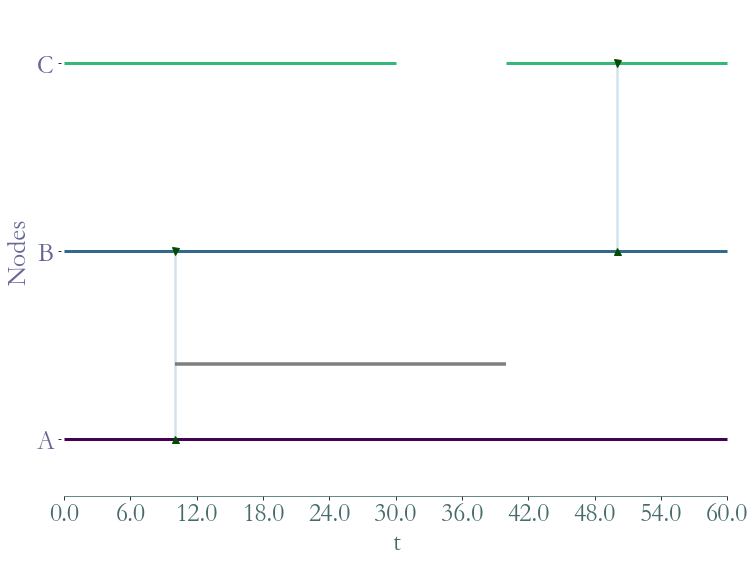

In [3]:
S = sg.StreamGraph(times = [0,60],
                   nodes = [0,1,2],
                   node_presence = [[0,60],
                                   [0,60],
                                   [0,30,40,60]],
                   links = [(0,1),(1,2)],
                   link_presence = [[10,40],
                                   [50,50]],
                   node_to_label = {0:'A',1:'B',2:'C'})
_ = S.plot()

## Reading Usual Datasets

A dynamic network is usually represented (and stored) by a sequence of temporal links and stored in a *.csv* or a *.tsv*.

The first step is to ensure that a *.csv* is temporally ordered. Several formats coexists, some with a timestamp denoting the existence of an interaction betweeen two entities at a given instant, some with both a beginning and an ending time for each interaction, some with an implicit duration for each interaction, ...

Therefore, parsers implemented in ``Straph`` are modular, they must be adjusted for each dataset.

In [4]:
entry_format = {'b_pos':0,'e_pos':1,'u_pos':2,'v_pos':3}
input_file = "examples/example.csv"
sg.sort_csv(input_file, entry_format, delimiter = ";",ignore_header = False)

Writing CSV: 100%|██████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 11003.42it/s]


After sorting a dataset in a temporal fashion we can load it as stream graph object.

In [5]:
S = sg.parser(input_file , entry_format= entry_format,
                delimiter = ";", input_format = 'csv', nodes_to_label = True,
             ignore_header = False);

Parsing CSV: 11it [00:00, 11355.49it/s]                                                                                


We can visualise this object with the ``.plot()`` function.

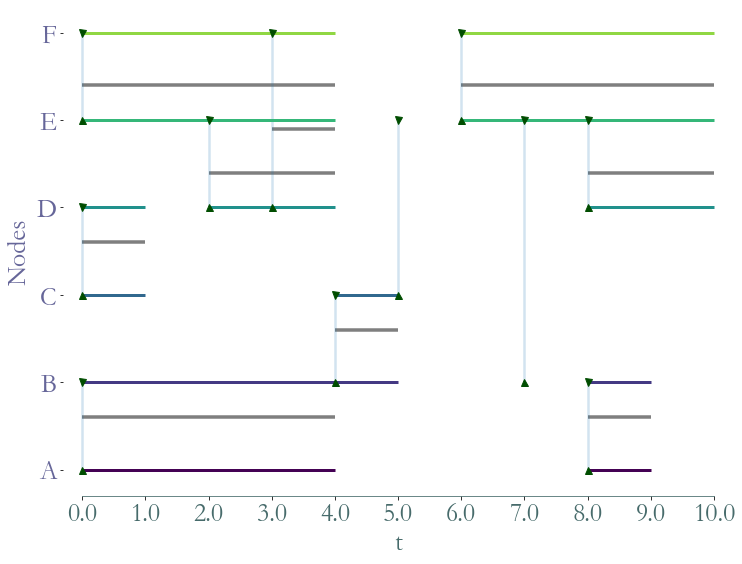

In [6]:
fig = S.plot()

The ``Straph`` module also as its own data format: *.sg*. This format is dedicated to stream graphs, its the fastest way to read and write with ``Straph`` ; it also support nodes appearances and disappearances (can encode the presence or absence of a node over time).

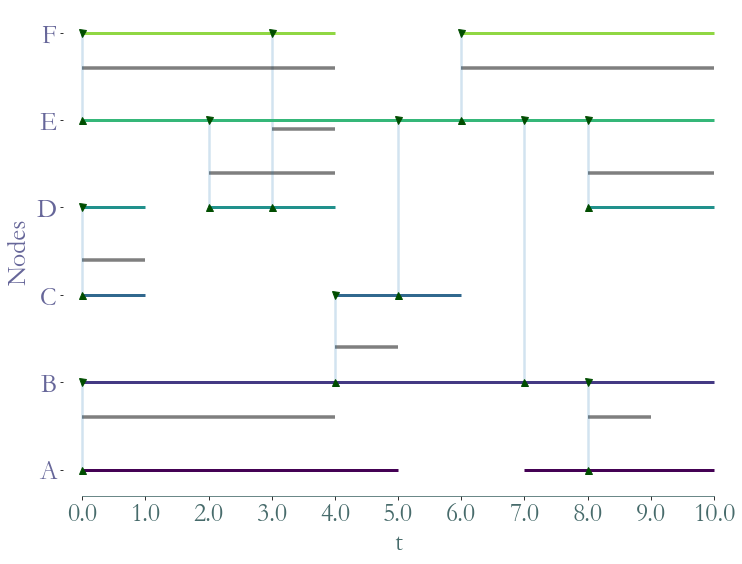

In [7]:
S = sg.read_stream_graph(path_links = "examples/example_links.sg",
                    path_nodes = "examples/example_nodes.sg")
fig = S.plot()

## Straph Functionalities

``Straph`` provides many features, some are 'global' and describe a stream graph as a whole, some concern only nodes or links, some features return constant other time series. We refer to the API reference for an extensive description and to the other tutorials for practical examples of ``Straph``'s functionalities.

For example we can obtain the number of nodes in a stream graph, defined by $\frac{|W|}{T}$, by calling the method ``.nb_nodes()``.

In [8]:
S.nb_nodes()

4.4

We can obtain the instant degree of each temporal node and graphically represent it.

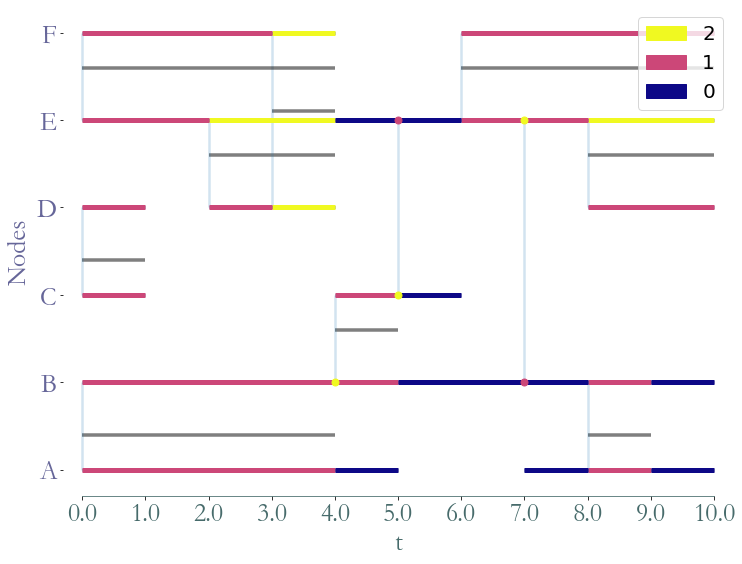

In [9]:
degrees = S.degrees_partition()
fig = S.plot(clusters = degrees)

We can also obtain the time series corresponding to the betweenness of node *B*.
In order to do so, we use the implementation of the betweenness of ``networkx``.

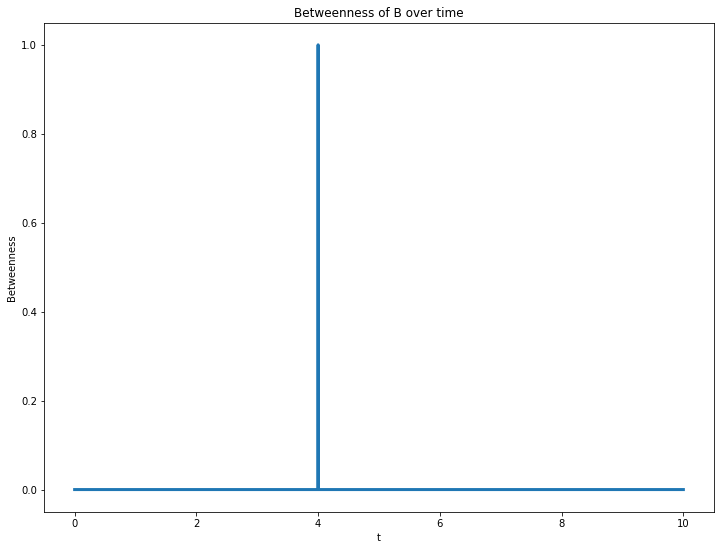

In [10]:
prop_nx = S.graph_property(nx.algorithms.centrality.betweenness_centrality, format = 'signal',datetime=False)
ax = prop_nx[1].plot(linewidth = 3,title = "Betweenness of B over time",
                    ylabel = "Betweenness",xlabel = "t")

Or we can observe the betweenness of each node:

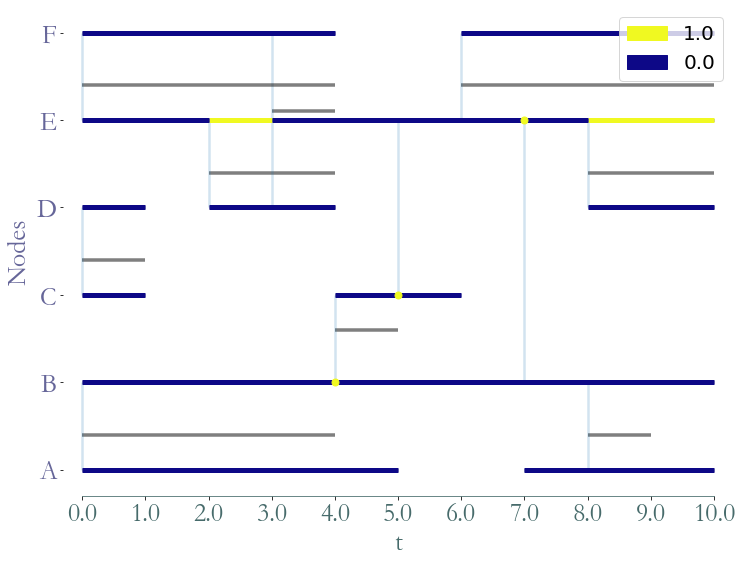

In [11]:
prop_nx = S.graph_property(nx.algorithms.centrality.betweenness_centrality, format = 'cluster')
_ = S.plot(clusters = prop_nx)